<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/Pandas_get_dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic -
# Categorical, Dummy Variables, One Hot Encoding

#using pandas get_dummies
#using sklearn OneHotEncoder

Build a predictor function to predict the price of a home -

1) With 3400 sqr ft area in west windsor

2) 2800 sqr ft area in robbinsville

How to handle text data in the column bcz ML model knows how to handle numeric data not text data -
So give each town a number (not the best approach as model starts comparing those numbers.)
Text data is categorical data - Nominal(no order or mathematical relation like male, female) and Ordinal (has some order difference like high, medium, low ---- graduate < masters < phd.)

There is a technique to encode categorical variable - **One Hot Encoding** ek row mai 1 baaki mai 0, these are also called dummy variables.

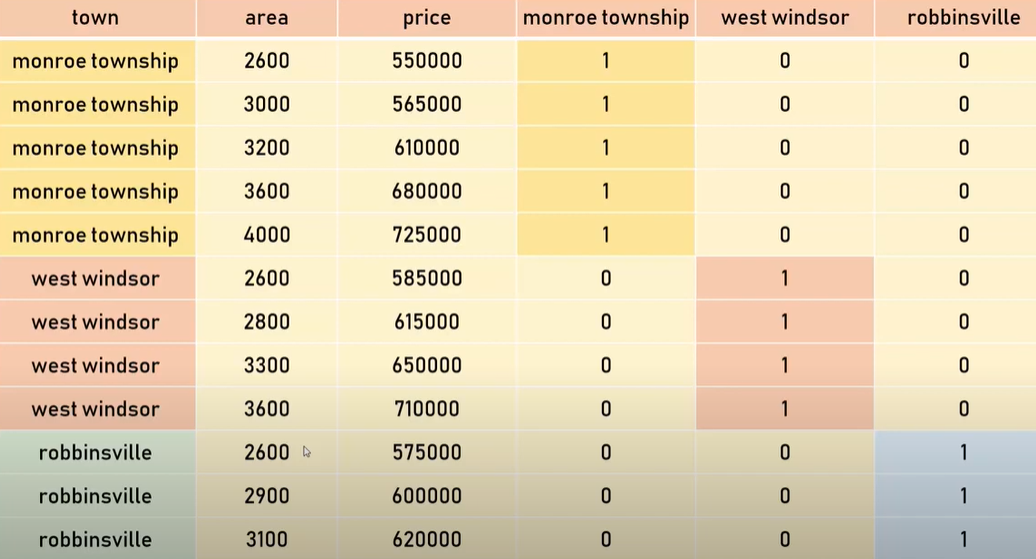

In [2]:
import pandas as pd

In [33]:
df = pd.read_csv("homeprices_1.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [6]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [7]:
df_dummies = pd.concat([df, dummies], axis = "columns")

In [8]:
df_dummies

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


We have to drop dummy column to avoid dummy variable trap - as there is multi co-linear as one column can be derived from other two column

*   No need for town column so drop that too



In [9]:
df_dummies.drop(['town','west windsor'], axis = "columns", inplace = True)

In [10]:
df_dummies

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


#price is a target variable hence dropping it too

In [12]:
x = df_dummies.drop(['price'], axis = "columns")

In [13]:
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


Since price is out target variable, which will be used to train the model to predict required prices hence dropped it and stored in a new variable

In [14]:
y = df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [15]:
from sklearn import linear_model

In [16]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [19]:
model.predict([[3400, 0, 0]]) #monroe township and robinsville will be 0 to get west windsor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [20]:
model.predict([[2800, 0, 1]]) #predicted price for robinsville

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [22]:
model.predict([[2800, 1, 0]]) #predicted price for monroe township

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([565089.22812299])

#Till now we used pandas get_dummies() now we will use sklearn onehotencoding method

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
#LabelEncoder converts our text columns into a number

In [34]:
le = LabelEncoder()
dfle = df
print(df)

               town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9       robinsville  2600  575000
10      robinsville  2900  600000
11      robinsville  3100  620000
12      robinsville  3600  695000


In [35]:
dfle.town = le.fit_transform(dfle.town)
print(dfle)

    town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000


#sklearn's one hot encoder accepts a 2D-array

In [39]:
X = dfle[['town','area']]
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [41]:
X.values #this converts the data frame to a 2D array

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [43]:
y = dfle.price.values
y #this makes a 1D array

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

In [48]:
from sklearn.preprocessing import OneHotEncoder